In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [3]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [4]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
mnist_test.__getitem__(0)[0].size(), mnist_test.__len__()

# 각 라벨별로 몇개의 데이터가 있는지 살펴보는 부분입니다.
count=[0]*10
print(count)
for i in range(mnist_train.__len__()):
    count[mnist_train.__getitem__(i)[1]]+=1

print(count)

torch.Size([1, 28, 28]) 60000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [5]:
dir(mnist_train) # 사용가능한 함수들
print(mnist_train.__dict__) 

{'root': './', 'transform': <torchvision.transforms.transforms.ToTensor object at 0x7fe8c5e00a20>, 'target_transform': None, 'train': True, 'train_data': 
(  0  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  1  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  2  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
 ...  

(59997,.,.) =

In [6]:
only_data = mnist_train.__dict__['train_data']
only_data


(  0  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  1  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  2  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
 ...  

(59997,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    

In [7]:
only_label = mnist_train.__dict__['train_labels']

idx_0 = (only_label==0) # 라벨이 0인 위치에만 1이 찍힌 텐서
idx_1 = (only_label==1) # 라벨이 1인 위치에만 1이 찍힌 텐서

#print(idx_0,idx_1,idx_0+idx_1) # 두개를 더하면 0,1의 위치에 1이 찍힌 텐서가 나옵니다.
print(torch.sum(idx_0),torch.sum(idx_1),torch.sum(idx_0+idx_1)) # 아까 확인해본 개수와 일치하는지 확인

print(idx_0.nonzero()[:,0]) # 0 이 아닌곳의 index 값을 리턴해주는 부분
new_idx= (idx_0+idx_1).nonzero()[:,0]
print(new_idx)

5923 6742 12665

     1
    21
    34
  ⋮   
 59952
 59972
 59987
[torch.LongTensor of size 5923]


     1
     3
     6
  ⋮   
 59984
 59987
 59994
[torch.LongTensor of size 12665]



In [8]:
new_data  = torch.index_select(only_data,0,new_idx)  # 원본데이터,어느 차원기준으로 인덱싱을 적용할것인지, 인덱스
new_label = torch.index_select(only_label,0,new_idx)

print(new_data,new_label)


(  0  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  1  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  2  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
 ...  

(12662,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    

In [9]:
# 새로운 데이터로 대체
mnist_train.__dict__['train_data'] = new_data
mnist_train.__dict__['train_data']


(  0  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  1  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0

(  2  ,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
 ...  

(12662,.,.) = 
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
    0    0    0  ...     0    0    0
      ...         ⋱        ...      
    

In [10]:
# 새로운 라벨로 대체
mnist_train.__dict__['train_labels'] = new_label
mnist_train.__dict__['train_labels']


 0
 1
 1
⋮ 
 1
 0
 1
[torch.LongTensor of size 12665]

In [11]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size=batch_size, 
                                           shuffle=True,
                                           num_workers=2,
                                           drop_last=True)

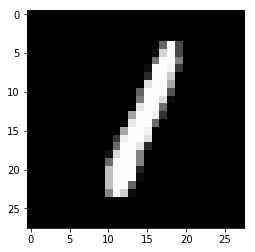

1


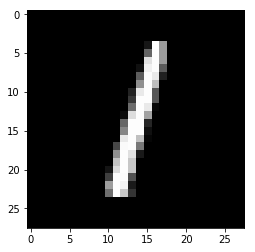

1


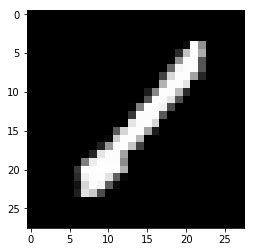

1


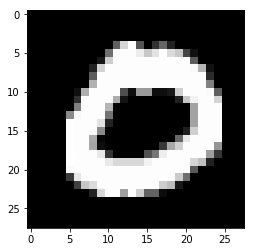

0


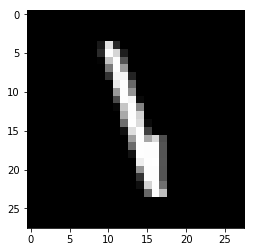

1


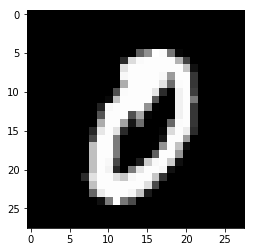

0


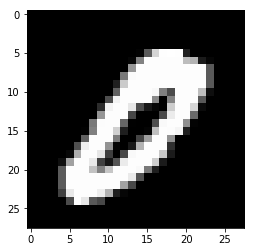

0


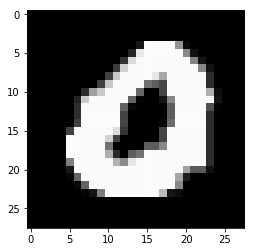

0


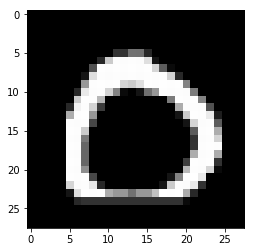

0


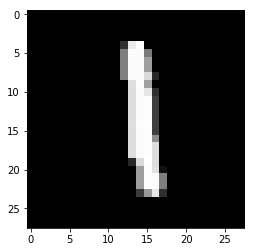

1


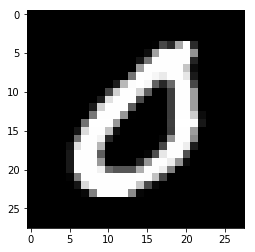

0


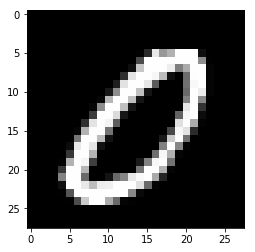

0


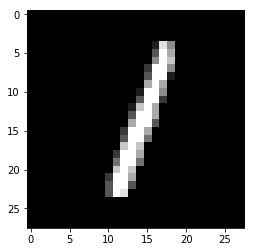

1


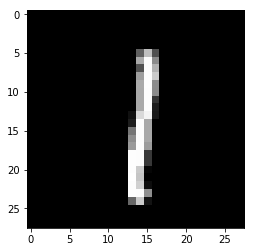

1


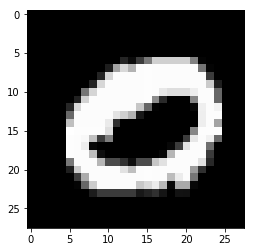

0


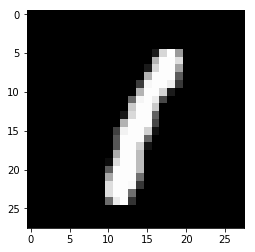

1


In [12]:
for image,label in train_loader:
    img = image.numpy()
    for i in range(batch_size):
        plt.imshow(img[i,0,:,:],cmap='gray')
        plt.show()
        print(label[i])
    break